In [1]:
import matplotlib.pyplot as plt
import numpy as np

Primer resultando con bajo nivel de aproximación

In [86]:
rs = 2.95e5 # cm proviene de rs = 2.95e3 # metros
scsg_pi = 6.48e7 #segundos / siglo factor

def phi_r(e, l, tau):
    l = l * 1e11 # asume las coordenadas en 10^11 cm
    return (1/l**2) * (2 + e**2 + (2+3*e**2)*(3/(2*l))*rs - 2*l**2) * tau * scsg_pi

def phi_alpha(e,l,tau,alpha):
    l = l * 1e11 # asume las coordenadas en 10^11 cm
    return (alpha/l**2)*( (1-alpha/4) * (2 + e**2) + rs*(2+3*e**2)/(l*4) ) * tau * scsg_pi

def phi_gamma(e, l, tau, gamma):
    l = l * 1e11 # asume las coordenadas en 10^11 cm
    return (gamma/l)*(10-rs*(2+e**2)/(3*l) - 2 * gamma**2 / 3) * tau *scsg_pi

def phi_alpha_gamma(e,l,tau,alpha,gamma):
    l = l * 1e11 # asume las coordenadas en 10^11 cm
    return -(7*alpha*gamma/(6*l)) * tau * scsg_pi

def Phi(alpha,gamma,e,l,tau):
    """ El avance total del perihelio"""
    return phi_r(e, l, tau) + phi_alpha(e,l,tau,alpha) + phi_gamma(e, l, tau, gamma) + phi_alpha_gamma(e,l,tau,alpha,gamma)

los arcosegundos por año que entrega son demasiado grandes

In [87]:
# el termino más grande con los datos de mercurio da un resultado que parece explotar numericamente
# posiblemente debido a la precisión numerica o a algo que habria sido ignorado en la aproximación
phi_r(np.float64(0.206), np.float64(55.3), np.float64(4.15))

-537839999.9999999

In [64]:
# los demas componentes son mucho más pequeños
phi_alpha_gamma(np.float64(0.206),227e11,np.float64(4.15),1e-11,1e-11)

-1.3821145374449338e-38

In [65]:
# debido a esto, se retrocederá para reaproximar
Phi(1e-11,1e-11,np.float64(0.206),np.float64(55.3),np.float64(4.15))

-537839999.9999999

continuesé de Problema1_Parte3:

Procediendo a eliminar varios componentes y de acuerdo a lo que se encuentra en la parte 3 del problema 1:

In [88]:
# se usa para escribir los radianes por periodo en segundos por siglo
rad_to_seg = (180/np.pi)*(3600/1)
# multiplicado por tau, que seria los periodos en un año terrestre
# scsg
scsg = rad_to_seg * 10**2

In [89]:
rs = 2.95e5 # cm proviene de rs = 2.95e3 # metros
M = rs/2 # M en cm
pi = np.pi

def phi_r(e, l, tau):
    l = l * 1e11
    return 2 * pi * 3 * M / l

def phi_alpha(e,l,tau,alpha):
    l = l * 1e11
    return 2*pi*(1+ 3*M/(2*l)) * alpha

def phi_gamma(e, l, tau, gamma):
    l = l * 1e11
    return 2*pi*(4*M/3 + 5*(l+e**2)/6) * gamma

def phi_alpha_gamma(e,l,tau,alpha,gamma):
    l = l * 1e11
    return 2*pi*(5*(l+e**2)/12)*gamma*alpha

def Phi(alpha,gamma,e,l,tau):
    """ El avance total del perihelio"""
    return (phi_r(e, l, tau) + phi_alpha(e,l,tau,alpha) + phi_gamma(e, l, tau, gamma) + phi_alpha_gamma(e,l,tau,alpha,gamma)) * tau *scsg

In [90]:
# el primer termino ignorando todo lo demas entrega un buen rango
# phi_r(e, l, tau) = 6 pi M * tau / l
2 * pi * 3 * M*scsg*tau / (l*1e11)

43.03692585895118

In [91]:
# las observaciones, usando los del paper de S. Cornbleet
# y tambien Planetary Fact Sheet Notes. (2021). Nasa.gov. https://nssdc.gsfc.nasa.gov/planetary/factsheet/planetfact_notes.html#orbe
mercurio = {    'nombre':'Mercurio','tau':np.float64(4.15),   'l':np.float64(55.3), 'shift':np.float64(43.0),   'e':np.float64(0.206)}
venus = {       'nombre':'Venus',   'tau':np.float64(1.622),  'l':np.float64(108),  'shift':np.float64(8.6),  'e':np.float64(0.007)}
tierra = {      'nombre':'Tierra',  'tau':np.float64(1),      'l':np.float64(149),  'shift':np.float64(3.8),  'e':np.float64(0.017)}
marte = {       'nombre':'Marte',   'tau':np.float64(0.531),  'l':np.float64(227),  'shift':np.float64(1.35), 'e':np.float64(0.094)}

In [213]:
planeta = mercurio # diccionario
nombre = planeta['nombre']
tau = planeta['tau']
l = planeta['l']
e = planeta['e']
shift = planeta['shift']

In [ ]:
# ya que se desea explorar un rango de parametros
# probando disminuir más y más los rangos se encuentra un rango de estos valores
alpha_range = np.linspace(0,1e-17,5000)
gamma_range = np.linspace(0,1e-17,5000)
A,G = np.meshgrid(alpha_range, gamma_range)

In [111]:
output= Phi(A,G,e,l,tau)

ERROR! Session/line number was not unique in database. History logging moved to new session 649


In [118]:
noise = output - shift

finalmente despues de investigar e intentar, un codigo para visualizar las zonas

In [283]:
alpha_range = np.linspace(0,1e-9,2000)
gamma_range = np.linspace(0,1e-15,2000)
A,G = np.meshgrid(alpha_range, gamma_range)
output= Phi(A,G,e,l,tau) - shift

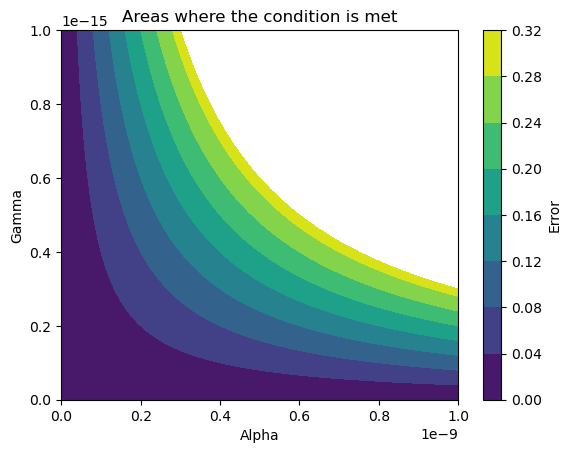

In [282]:
# Testing de codigo
condicion =  0.30

output = A*G*1e24
masked_output = np.ma.masked_where(output >= condicion , output)
plt.contourf(A,G,masked_output)
plt.colorbar(label='Error')
plt.xlabel('Alpha')
plt.ylabel('Gamma')
plt.title('Areas where the condition is met')
plt.show()

Usando un rango que fue variando manualmente hasta alcanzar el error deseado de 0.05

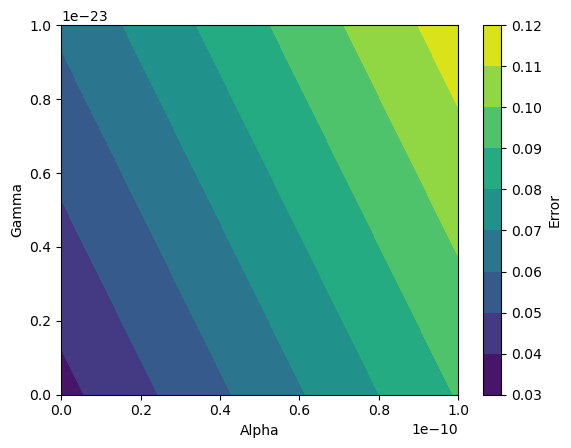

In [326]:
alpha_range = np.linspace(0,1e-10,1000)
gamma_range = np.linspace(0,1e-23,1000)
A,G = np.meshgrid(alpha_range, gamma_range)
output= Phi(A,G,e,l,tau) - shift
plt.contourf(A,G,output)
plt.colorbar(label='Error')
plt.xlabel('Alpha')
plt.ylabel('Gamma')
plt.show()

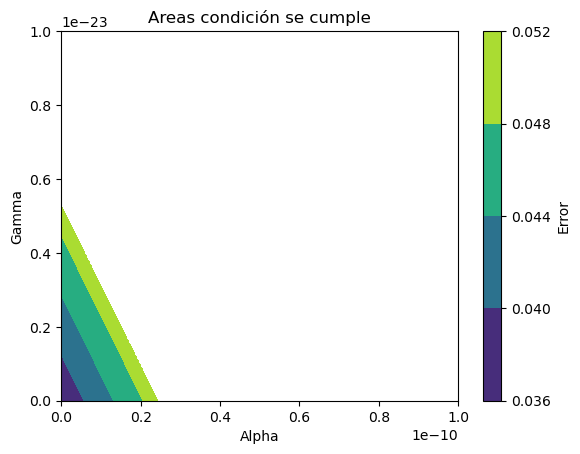

In [327]:
# Testing de codigo
condicion =  0.05

masked_output = np.ma.masked_where(output >= condicion , output) # no grafica donde el erro es mayor a condicion
plt.contourf(A,G,masked_output, levels=3)
plt.colorbar(label='Error')
plt.xlabel('Alpha')
plt.ylabel('Gamma')
plt.title('Areas condición se cumple')
plt.show()

### Repitiendo para otros planetas

In [329]:
planeta = venus # diccionario
nombre = planeta['nombre']
tau = planeta['tau']
l = planeta['l']
e = planeta['e']
shift = planeta['shift']

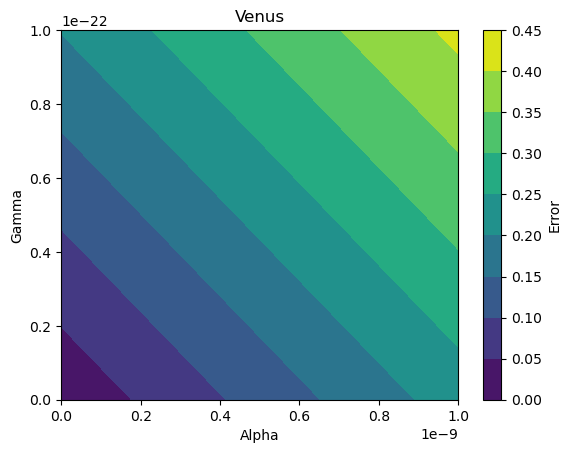

In [335]:
alpha_range = np.linspace(0,10e-10,1000)
gamma_range = np.linspace(0,10e-23,1000)
A,G = np.meshgrid(alpha_range, gamma_range)
output= Phi(A,G,e,l,tau) - shift
plt.contourf(A,G,output)
plt.colorbar(label='Error')
plt.title(nombre)
plt.xlabel('Alpha')
plt.ylabel('Gamma')
plt.show()

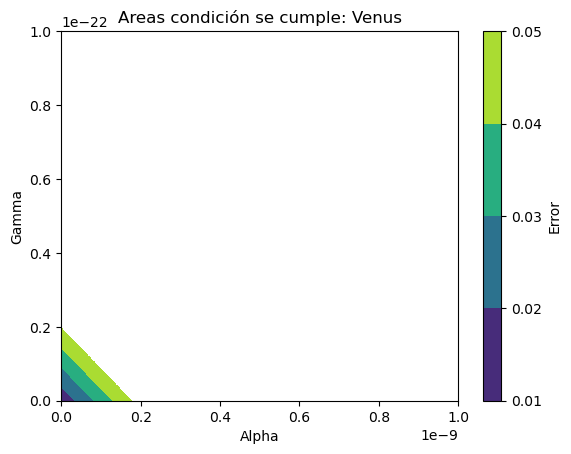

In [337]:
# Testing de codigo
condicion =  0.05

masked_output = np.ma.masked_where(output >= condicion , output) # no grafica donde el erro es mayor a condicion
plt.contourf(A,G,masked_output, levels=3)
plt.colorbar(label='Error')
plt.xlabel('Alpha')
plt.ylabel('Gamma')
plt.title('Areas condición se cumple: ' + nombre )
plt.show()

para la tierra

In [338]:
planeta = tierra # diccionario
nombre = planeta['nombre']
tau = planeta['tau']
l = planeta['l']
e = planeta['e']
shift = planeta['shift']

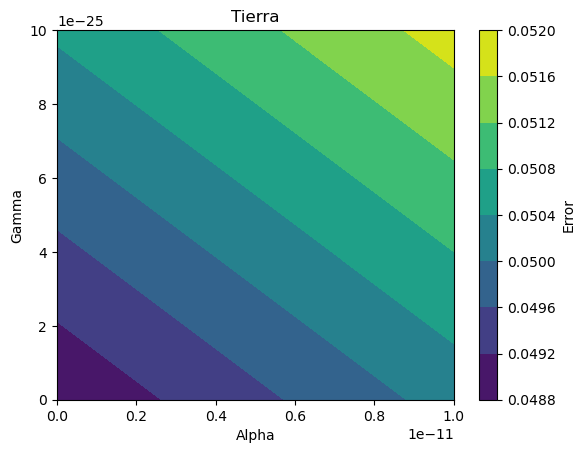

In [343]:
alpha_range = np.linspace(0,1e-11,1000)
gamma_range = np.linspace(0,1e-24,1000)
A,G = np.meshgrid(alpha_range, gamma_range)
output= Phi(A,G,e,l,tau) - shift
plt.contourf(A,G,output)
plt.colorbar(label='Error')
plt.title(nombre)
plt.xlabel('Alpha')
plt.ylabel('Gamma')
plt.show()

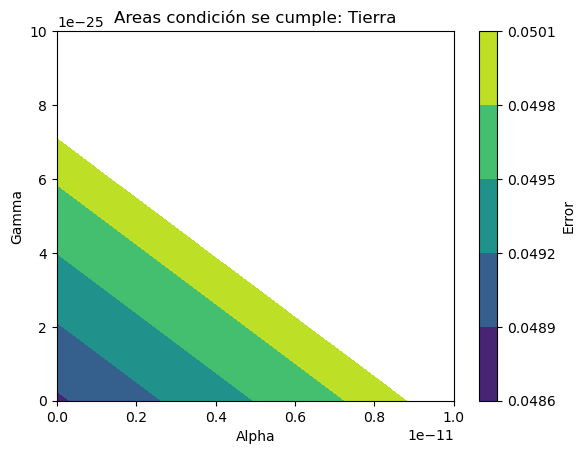

In [344]:
# Testing de codigo
condicion =  0.05

masked_output = np.ma.masked_where(output >= condicion , output) # no grafica donde el erro es mayor a condicion
plt.contourf(A,G,masked_output, levels=3)
plt.colorbar(label='Error')
plt.xlabel('Alpha')
plt.ylabel('Gamma')
plt.title('Areas condición se cumple: ' + nombre )
plt.show()

marte

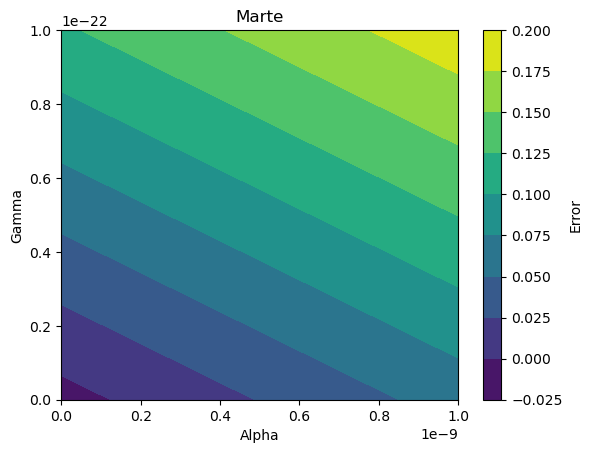

In [356]:
planeta = marte # diccionario
nombre = planeta['nombre']
tau = planeta['tau']
l = planeta['l']
e = planeta['e']
shift = planeta['shift']

alpha_range = np.linspace(0,1e-9,1000)
gamma_range = np.linspace(0,1e-22,1000)
A,G = np.meshgrid(alpha_range, gamma_range)
output= Phi(A,G,e,l,tau) - shift
plt.contourf(A,G,output)
plt.colorbar(label='Error')
plt.title(nombre)
plt.xlabel('Alpha')
plt.ylabel('Gamma')
plt.show()

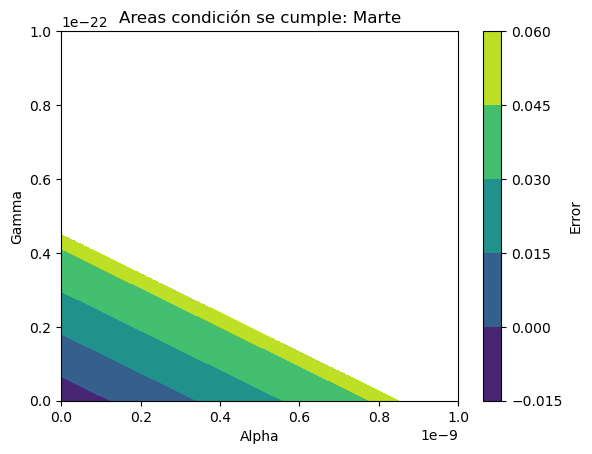

In [357]:
# Testing de codigo
condicion =  0.05

masked_output = np.ma.masked_where(output >= condicion , output) # no grafica donde el erro es mayor a condicion
plt.contourf(A,G,masked_output, levels=3)
plt.colorbar(label='Error')
plt.xlabel('Alpha')
plt.ylabel('Gamma')
plt.title('Areas condición se cumple: ' + nombre )
plt.show()

## Deflexión de Luz

In [2]:
rs = 2.95e5 # cm proviene de rs = 2.95e3 # metros
M = rs/2 # M en cm
R = 696340000*1e2 # radio del sol en cm

rad_to_sec = 180/np.pi * 3600

In [3]:
error_bound = 1e-4 # diferencia prograda y retrograda para el sol
def schw_deflection(M,R):
    return 4*M/R * rad_to_sec

schw_deflection(M,R)

1.7476553937126529

In [4]:
def quintestring_deflection(M,R,alpha,gamma):
    return (4*M/R + 7 * np.sqrt(2) * alpha / 6 + gamma * R) * rad_to_sec

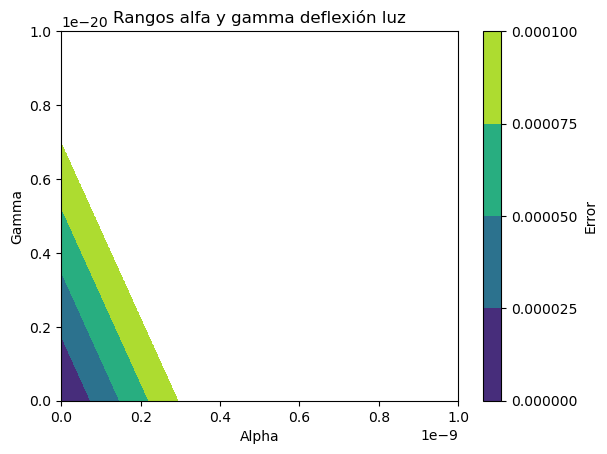

In [15]:
alpha_range = np.linspace(0,1e-9,1000)
gamma_range = np.linspace(0,1e-20,1000)
A,G = np.meshgrid(alpha_range, gamma_range)

error = quintestring_deflection(M,R,A,G) - schw_deflection(M,R)

# Testing de codigo
condicion =  error_bound

masked_output = np.ma.masked_where(error >= condicion , error) # no grafica donde el erro es mayor a condicion
plt.contourf(A,G,masked_output, levels=3)
plt.colorbar(label='Error')
plt.xlabel('Alpha')
plt.ylabel('Gamma')
plt.title("Rangos alfa y gamma deflexión luz")
plt.show()